### This notebook is an informal study of the correlation between mobility for each state and COVID cases. The intention is only to practice the use of tools for data analysis. A real analysis of the situation must be done by an epidemiologist.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta 

### loading and cleaning Global_Mobilty_report.csv

In [2]:
globalMobility = pd.read_csv('Global_Mobility_Report.csv', low_memory = False)

In [3]:
globalMobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [4]:
globalMobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458565 entries, 0 to 458564
Data columns (total 11 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 457777 non-null  object 
 1   country_region                                      458565 non-null  object 
 2   sub_region_1                                        445233 non-null  object 
 3   sub_region_2                                        265611 non-null  object 
 4   date                                                458565 non-null  object 
 5   retail_and_recreation_percent_change_from_baseline  358425 non-null  float64
 6   grocery_and_pharmacy_percent_change_from_baseline   345821 non-null  float64
 7   parks_percent_change_from_baseline                  212781 non-null  float64
 8   transit_stations_percent_change_from_baseline       244044 non-n

In [5]:
# selecting only the data of Brazil
mobilityBr = globalMobility[globalMobility.country_region_code == 'BR']

# removing globalMobility from the memory
del globalMobility 

# removing columns of country from the data frame after selection
mobilityBr.drop(['country_region_code', 'country_region'], inplace = True, axis = 1)

In [6]:
mobilityBr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 12791 to 15618
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sub_region_1                                        2727 non-null   object 
 1   sub_region_2                                        0 non-null      object 
 2   date                                                2828 non-null   object 
 3   retail_and_recreation_percent_change_from_baseline  2828 non-null   float64
 4   grocery_and_pharmacy_percent_change_from_baseline   2828 non-null   float64
 5   parks_percent_change_from_baseline                  2828 non-null   float64
 6   transit_stations_percent_change_from_baseline       2828 non-null   float64
 7   workplaces_percent_change_from_baseline             2828 non-null   float64
 8   residential_percent_change_from_baseline            2828 non-null   float6

sub_region_1 refers to the state of Brasil and sub_region_2 for brasil do not have data.

In [7]:
# changing the name of the sub_region_1 column to state
mobilityBr.rename({'sub_region_1':'state'}, axis = 1, inplace = True)

# removing column empty
mobilityBr.drop(['sub_region_2'], axis = 1, inplace = True)

The covid data is using the state with the code so will be necessary convert the name of the state to the code

In [8]:
states = {'Acre':  'AC', 'Alagoas' : 'AL', 'Amapá' : 'AP',
          'Amazonas':'AM', 'Bahia':'BA', 'Ceará':'CE',
          'Federal District':'DF', 'Espírito Santo':'ES', 'Goiás':'GO',
          'Maranhão':'MA', 'Mato Grosso':'MT', 'Mato Grosso do Sul':'MS',
          'Minas Gerais':'MG','Pará':'PA','Paraíba':'PB','Paraná':'PR',
          'Pernambuco':'PE','Piauí':'PI','Rio de Janeiro':'RJ',
          'Rio Grande do Norte':'RN','Rio Grande do Sul':'RS','Rondônia':'RO',
          'Roraima':'RR','Santa Catarina':'SC','São Paulo':'SP',
          'Sergipe':'SE','Tocantins':'TO'}

In [9]:
mobilityBr['state'] = mobilityBr.state.str.replace('State of ', '').map(states)

In [10]:
mobilityBr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 12791 to 15618
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   state                                               2727 non-null   object 
 1   date                                                2828 non-null   object 
 2   retail_and_recreation_percent_change_from_baseline  2828 non-null   float64
 3   grocery_and_pharmacy_percent_change_from_baseline   2828 non-null   float64
 4   parks_percent_change_from_baseline                  2828 non-null   float64
 5   transit_stations_percent_change_from_baseline       2828 non-null   float64
 6   workplaces_percent_change_from_baseline             2828 non-null   float64
 7   residential_percent_change_from_baseline            2828 non-null   float64
dtypes: float64(6), object(2)
memory usage: 198.8+ KB


In [11]:
# checking duplicates
len(mobilityBr[mobilityBr.duplicated(subset = ['date', 'state'])])

0

There is note data of the same data of the same state

The data of covid have a delay related to the data of mobility. The people that are contamined today will be diagnosticade only after a week at least 

In [12]:
# that will be created a column called data_affected that effect the data of covid
mobilityBr['data_affected'] = mobilityBr.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d') + timedelta(days = 7))

### loading and cleaning covid19-BR.csv

In [13]:
covidBr = pd.read_csv('covid19-BR.csv')

In [14]:
covidBr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149829 entries, 0 to 149828
Data columns (total 16 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   epidemiological_week                           149829 non-null  int64  
 1   date                                           149829 non-null  object 
 2   order_for_place                                149829 non-null  int64  
 3   state                                          149829 non-null  object 
 4   city                                           147638 non-null  object 
 5   city_ibge_code                                 148627 non-null  float64
 6   place_type                                     149829 non-null  object 
 7   last_available_confirmed                       149829 non-null  int64  
 8   last_available_confirmed_per_100k_inhabitants  144778 non-null  float64
 9   new_confirmed                        

In [15]:
covidBr.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,23,2020-06-01,65,AC,Acrelândia,1200013.0,city,158,1035.65810,0,1,0,0.0063,15256.0,True,False
1,23,2020-06-01,32,AC,Assis Brasil,1200054.0,city,28,377.51112,1,2,0,0.0714,7417.0,True,False
2,23,2020-06-01,24,AC,Brasiléia,1200104.0,city,38,144.60766,1,2,0,0.0526,26278.0,True,False
3,23,2020-06-01,55,AC,Bujari,1200138.0,city,49,477.30372,0,2,0,0.0408,10266.0,True,False
4,23,2020-06-01,25,AC,Capixaba,1200179.0,city,40,340.91878,0,1,0,0.0250,11733.0,True,False


In [16]:
# the data of mobility is only by state that is the sum of all cities of the state
# the data about cities will be remove of the analysis
covidBr = covidBr[covidBr.place_type == 'state']

# only the data of states is been using so the columns city, city_ibge_code and place_type are unnecessary
covidBr.drop(['city', 'city_ibge_code', 'place_type'], axis = 1, inplace = True)

# is_last is only a column that shows if is the last data or not it can be droped
covidBr.drop(['is_last'], axis = 1, inplace = True)

In [17]:
# sorting the data frame and reseting the index
covidBr = covidBr.sort_values(['state', 'date']).reset_index(drop = True)

# converting date to datetime
covidBr['date'] = covidBr.date.apply((lambda x: datetime.strptime(x, '%Y-%m-%d')))

In [18]:
# checking data that was not actualized
covidBr.is_repeated.value_counts()

False    2111
True       80
Name: is_repeated, dtype: int64

Some days are not actualized that will not be a problem when group the data by week.

In [19]:
# checking duplicates
len(covidBr[covidBr.duplicated(subset = ['date', 'state'])])

0

There is no data of the same date of the same state

In [20]:
# the epidemiological week is defined by the start pandemic on Wuhan.
# it is more useful define the epidemiological_week as the start on the state
weekStart = covidBr[['epidemiological_week', 'state']].groupby('state').min().to_dict()['epidemiological_week']
covidBr['epidemiological_week'] = covidBr[['epidemiological_week', 'state']].apply(lambda x: x['epidemiological_week'] - weekStart[x['state']], axis = 1)

the increase in number of cases is a function of the number of active cases and the table do not have active cases. I will consider that after 21 days the cases recovered or died so I will consider inactive and actives will be the last_available_confirmed minus inactive

In [21]:
state = covidBr.iloc[0].state
newCases = list()

for index ,row in covidBr.iterrows():
    if row.state != state:
        newCases = list()
        state = row.state
    if len(newCases) > 21:
        covidBr.loc[index, 'inactives'] = sum(newCases[:-21])
    else:
        covidBr.loc[index, 'inactives'] = 0
    newCases.append(row.new_confirmed)

covidBr['actives'] = covidBr['last_available_confirmed'] - covidBr['inactives']

### Merging data from mobility with data of covid

In [22]:
covidMerged = covidBr.merge(mobilityBr, how = 'inner', left_on = ['date', 'state'], right_on = ['data_affected', 'state'])

In [23]:
# grouping the data by week. The columns new_confirmed, new_deaths, actives and inactives need to be added by week
covidGrouped = covidMerged[['state', 'epidemiological_week', 'new_confirmed', 'new_deaths', 'actives', 'inactives']].groupby(['state', 'epidemiological_week']).sum()
# the colums last_available_confirmed, last_available_confirmed_per_100k_inhabitants and last_available_death_rate needs be taken the last
covidGrouped = covidGrouped.merge(covidMerged[['state', 'epidemiological_week', 'last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate']].groupby(['state', 'epidemiological_week']).last(), how = 'left', right_index = True, left_index = True)
# the colums of movimentation and population will be made an average
covidGrouped = covidGrouped.merge(covidMerged[['state', 'epidemiological_week', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].groupby(['state', 'epidemiological_week']).mean(), how = 'left', right_index = True, left_index = True)

In [24]:
# adding a new column of the percentage increase of the number of cases from the next week
covidGrouped['increase'] = covidGrouped[['new_confirmed', 'actives']]\
.apply(lambda x: (x['new_confirmed']/(x['actives'] - x['new_confirmed'])) if (x['actives'] - x['new_confirmed']) != 0 else np.NAN, axis = 1)

In [25]:
# the last week do not have all the days of the week so it is better remove
remove = []

for state in covidGrouped.index.levels[0]:
    remove.append((state, covidGrouped.loc[state].index.max()))
    
covidGrouped.drop(remove, inplace = True)

In [26]:
# importing libraries of machine learning
from sklearn.metrics import r2_score

In [27]:
corrDict = dict()
mobilityColumns = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
corrDict['BR'] = covidGrouped.reset_index(drop = True)[mobilityColumns + ['increase']].corr()['increase'].drop('increase')

for state in covidGrouped.index.levels[0]:
    corrDict[state] = covidGrouped[mobilityColumns + ['increase']].loc[state].corr()['increase'].drop('increase')

corrState = pd.DataFrame(corrDict).T

In [28]:
corrState

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
BR,0.567466,0.382389,0.444720,0.534150,0.514915,-0.550326
AC,0.856756,0.512868,0.886557,0.792884,0.838306,-0.856489
AL,0.590248,0.547488,0.656190,0.523091,0.557126,-0.602257
AM,0.906041,0.770167,0.857606,0.872426,0.835037,-0.874534
AP,0.849647,0.603498,0.807823,0.846296,0.866019,-0.872216
BA,0.559183,0.482184,0.558562,0.516100,0.496156,-0.525628
CE,0.929098,0.646313,0.848172,0.924966,0.912329,-0.922573
DF,0.913425,0.622895,0.787742,0.891726,0.907582,-0.907037
ES,0.822643,0.614466,0.757722,0.798496,0.744521,-0.778447
GO,0.734017,0.517430,0.615743,0.705798,0.671641,-0.730667


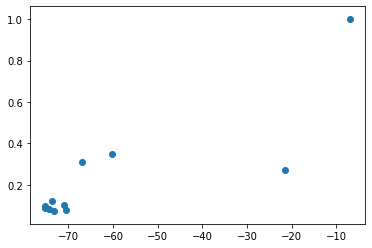

In [29]:
state = 'AP'

x = covidGrouped.loc[state, 'transit_stations_percent_change_from_baseline']
y = covidGrouped.loc[state].increase

plt.scatter(x, y)

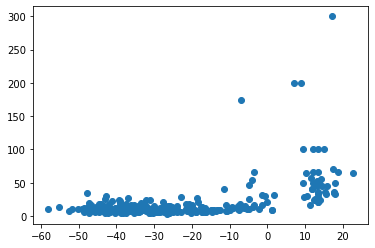

In [35]:
x = covidGrouped.reset_index()['workplaces_percent_change_from_baseline']
y = covidGrouped.reset_index().increase*100

plt.scatter(x, y)